In [3]:
import numpy as np
import pandas as pd
import spacy
# need that if we load later on?
# import de_core_news_lg
import matplotlib.pyplot as plt

In [4]:
json = pd.read_json("/Users/Leonidas/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/Coding/1-Data/recipes.json")
df = json

In [5]:
# Create test data: Last 1190 recipes
eval_df = df[11000:]
eval_df.shape

(1190, 8)

In [6]:
# Remove test data from df
df = df[:11000]
df.shape

(11000, 8)

In [7]:
# Remove all components but the tokenizer from the pipeline
nlp = spacy.load('de_core_news_lg', disable=['parser', 'tagger', 'ner'])

In [8]:
%%time
# Tokenize the indtructions
tokenized = [nlp(t) for t in df.Instructions.values]

CPU times: user 3.27 s, sys: 208 ms, total: 3.48 s
Wall time: 3.85 s


In [9]:
vocab = {"<UNK>": 1, "<PAD>": 0}
for txt in tokenized:
    for token in txt:
        if token.text not in vocab.keys():
            vocab[token.text] = len(vocab)
print("Number of unique tokens: {}".format(len(vocab)))

Number of unique tokens: 17556


In [10]:
# Extract ingredients column from df
ingredients = df.Ingredients
# ingredients.head()

In [11]:
# ingredients[0]

In [12]:
# Clean ingredients from stop words
from ingredient_functions import _filter, _clean

In [15]:
# Test
# clean = [_clean(t.text) for i in ingredients[0] for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
# clean
ingredients

0        [600 g Hackfleisch, halb und halb, 800 g Sauer...
1        [1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...
2        [1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...
3        [500 g Spargel, grüner, 300 ml Brühe oder Fond...
4        [250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...
                               ...                        
10995    [1 Fladenbrot(e), 3 Tomate(n), in dünne Scheib...
10996    [1 m.-große Ente(n) (ca. 2,3 kg), 1 Glas Rotko...
10997    [Für die Füllung:, 1 Handvoll Pilze, gemischte...
10998    [800 g Rindfleisch (z. B. Entrecote), beim Met...
10999    [600 g Fischfilet(s), (geräuchertes Butterfisc...
Name: Ingredients, Length: 11000, dtype: object

In [16]:
def get_labels(ingredients, tokenized_instructions):
    labels = []
    for ing, ti in zip(ingredients, tokenized_instructions):
        l_i = []
        ci = [_clean(t.text) for i in ing for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
        label = []
        for token in ti:
            l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
        labels.append(l_i)
    return labels

In [17]:
%%time
labels = get_labels(ingredients, tokenized)

CPU times: user 47.8 s, sys: 540 ms, total: 48.3 s
Wall time: 56.7 s


In [18]:
set([t.text for t, l in zip(tokenized[0], labels[0]) if l])

{'Becher',
 'Hackfleisch',
 'Knoblauch',
 'Kolbász',
 'Kümmel',
 'Lorbeerblättern',
 'Paprikapulver',
 'Pfeffer',
 'Reis',
 'Salz',
 'Sauerkraut',
 'Schmand',
 'Speck',
 'Wasser',
 'Wurst',
 'Zwiebel',
 'Öl'}

In [19]:
print(len(tokenized[0]))
labels_zero = pd.DataFrame(zip(tokenized[0], labels[0]))

341


In [20]:
labels_zero[labels_zero[1] == True].head(10)

,0,1
16,Reis,True
25,Wurst,True
27,Kolbász,True
35,Knoblauch,True
42,Zwiebel,True
54,Knoblauch,True
56,Hackfleisch,True
66,Hackfleisch,True
82,Salz,True
84,Pfeffer,True


In [21]:
labels_zero[labels_zero[1] == False].head(20)

,0,1
0,Die,False
1,Eier,False
2,hart,False
3,kochen,False
4,.,False
5,Dann,False
6,pellen,False
7,und,False
8,mit,False
9,einem,False


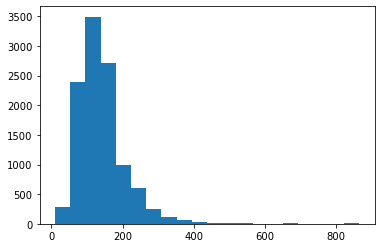

In [22]:
%matplotlib inline
plt.hist([len([t for t in tokens]) for tokens in tokenized], bins=20);

In [44]:
max_len = 400